In [1]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Root',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/User/OneDrive/Desktop/sql plus python'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "Root",
                            database = "ecommerce")

cur = db.cursor()


List all unique cities where customers are located


In [6]:
query = """ select distinct customer_city from customers"""

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

Find the total sales per category

In [7]:
query = """ select products.product_category category,
round(sum(payments.payment_value),2) sales
from products 
join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)

data = cur.fetchall()

data

[('perfumery', 60808639.19),
 ('Furniture Decoration', 171621167.01),
 ('telephony', 58425846.09),
 ('bed table bath', 205506440.52),
 ('automotive', 102275319.74),
 ('computer accessories', 190239653.55),
 ('housewares', 131370975.63),
 ('babies', 64781479.17),
 ('toys', 74284522.74),
 ('Furniture office', 77619178.46),
 ('Cool Stuff', 93563760.01),
 ('HEALTH BEAUTY', 198884774.33),
 ('pet Shop', 37352276.44),
 ('General Interest Books', 7763371.15),
 ('stationary store', 38092808.36),
 ('Watches present', 171506001.43),
 ('PCs', 33494585.92),
 ('climatization', 10940479.14),
 ('Construction Tools Construction', 28977075.63),
 ('sport leisure', 167055307.1),
 ('Bags Accessories', 22458154.85),
 ('electronics', 31182851.96),
 ('Casa Construcao', 16397434.84),
 ('Games consoles', 23457645.5),
 ('Fashion Bags and Accessories', 26178993.6),
 ('home appliances', 11463872.38),
 ('Garden tools', 100593690.09),
 ('Agro Industria e Comercio', 14247673.27),
 (None, 30336205.21),
 ('audio', 7238

Calculate the percentage of orders that were paid in installments

In [8]:
query = """ select (sum(case when payment_installments >= 1 then 1 else 0 end))/count(*)*100 from payments"""

cur.execute(query)

data = cur.fetchall()
data

[(Decimal('99.9981'),)]

Count the no. of customers from each state

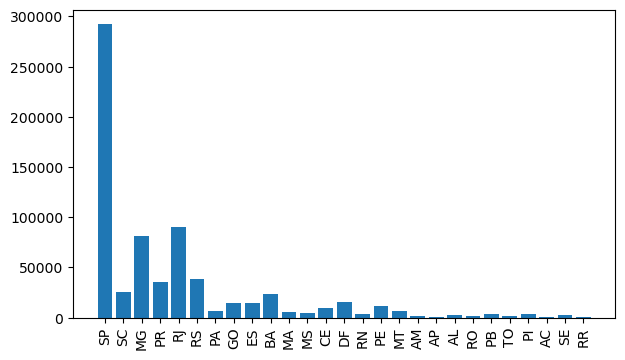

In [9]:
query = """ select customer_state , count(customer_id)
from customers group by customer_state
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count"])
df
plt.figure(figsize = (7,4))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.show()

Calculate the numberof orders per months in 2018

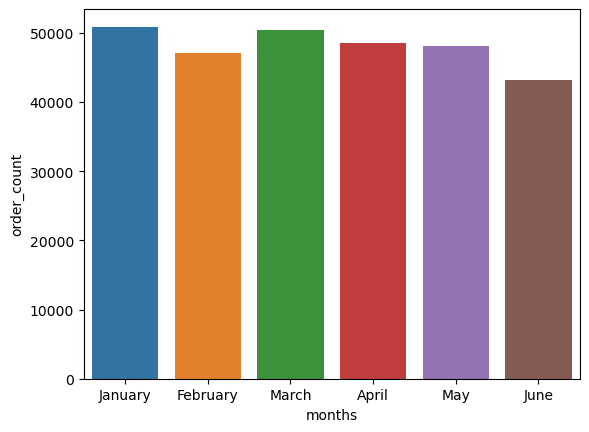

In [10]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["months", "order_count"])
o = ["January", "February", "March", "April", "May", "June"]

sns.barplot(x = df["months"],y = df["order_count"], data =df, order = o)
plt.show()


Identify the correlation between product price and the number of times a product has been purchased.

In [11]:
query ="""SELECT products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Category", "order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

a =  np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])

the correlation is -0.10631514167157559


Here we can see the correlation is having negative value but its not extreme -1 which means inversely proportional or 1 meaning directly proportional thus there is a weak correaltion between product price and no. of times a product has been purchased.

Find the average number of products per order, grouped by customer city

In [12]:
query = """with count_per_order as
(select orders.order_id, orders.customer_id, count(order_items.order_id)
as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders from 
customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city"""

cur.execute(query)

data = cur.fetchall()
data

[('treze tilias', Decimal('35.64')),
 ('indaial', Decimal('31.23')),
 ('sao jose dos campos', Decimal('31.88')),
 ('sao paulo', Decimal('32.37')),
 ('porto alegre', Decimal('32.90')),
 ('santos', Decimal('32.52')),
 ('sao francisco do sul', Decimal('34.59')),
 ('sao vicente', Decimal('30.55')),
 ('joinville', Decimal('30.87')),
 ('sao vendelino', Decimal('28.00')),
 ('belo horizonte', Decimal('32.01')),
 ('bage', Decimal('29.33')),
 ('gravatai', Decimal('29.75')),
 ('sumare', Decimal('31.71')),
 ('rio de janeiro', Decimal('32.11')),
 ('navegantes', Decimal('32.52')),
 ('chapada do norte', Decimal('28.00')),
 ('frederico westphalen', Decimal('30.00')),
 ('contagem', Decimal('32.04')),
 ('curitiba', Decimal('32.47')),
 ('guaranta', Decimal('28.00')),
 ('miracema', Decimal('29.47')),
 ('campo grande', Decimal('32.00')),
 ('rodeio', Decimal('32.00')),
 ('barueri', Decimal('31.26')),
 ('urussanga', Decimal('28.00')),
 ('osorio', Decimal('32.80')),
 ('duque de caxias', Decimal('32.15')),
 ('

Calculate the percentage of orders that were paid in installments

In [13]:
query = """ select ((sum(case when payment_installments >= 1 then 1
else 0 end))/count(*))*100 from payments
"""

cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

Calculate the total revenue generated by each seller, and rank them by revenue

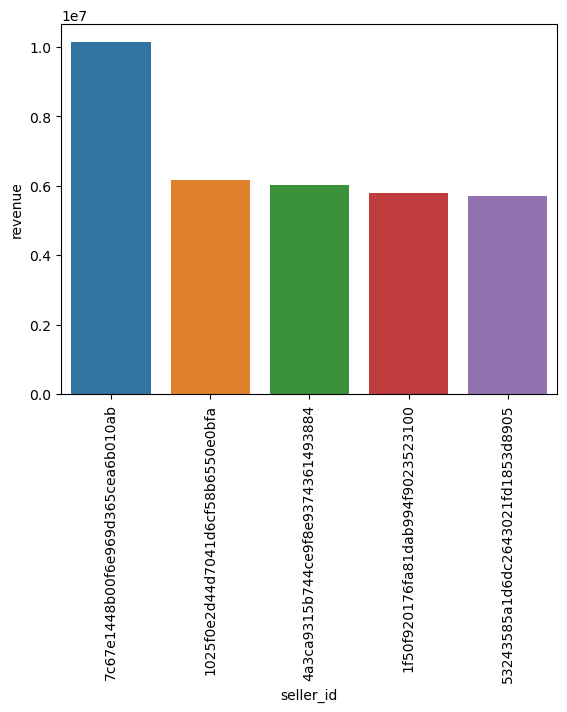

In [14]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

Calculate the year-over-year growth rate of total sales.

In [15]:
query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703758
2,2018,20.000924
